##  Take grayscale image of size 512x512, add some Gaussian noise and perform the following operations in frequency domain –


### import neccesary libraries


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

### Load the original image and convert it to grayscale

The Shape of the image is: (688, 688)


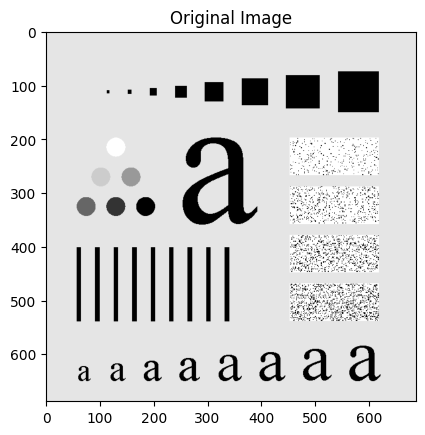

Min pixel intensity : 0
Max pixel intensity : 255


In [2]:
original_image = cv2.imread("images/Characters_Test_Pattern.tif", cv2.IMREAD_GRAYSCALE)
print(f"The Shape of the image is: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title("Original Image") 
plt.show()

print(f"Min pixel intensity : {np.min(original_image)}")
print(f"Max pixel intensity : {np.max(original_image)}")

### Function for ButterWorth low pass filter

In [3]:
def butterWorth_lowPass_filter (image, order, cuttoff_freq):
    height, width = image.shape 
    c1, c2 = height /2 , width /2 #center of the frequency domain 
    butter_worth_filter = np.zeros((height, height), dtype=np.float64)

    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt ((u - c1) **2 + (v - c2) ** 2)
            butter_worth_filter[u,v] = 1 / (1 + (D_uv / cuttoff_freq) ** (2 * order))


    filtered_image = image * butter_worth_filter 
    return filtered_image        

### Function for Gaussian low pass filter

In [4]:
def gaussian_lowPass_filter(image, cuttoff_freq):
    height , width = image.shape 
    c1, c2 = height /2 , width /2 
    gaussian_filter = np.zeros((height, width), dtype=np.float64)

    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u - c1) ** 2 + (v - c2)**2)
            gaussian_filter[u,v] =np.exp(- (D_uv **2) / (2 * (cuttoff_freq**2)))

    filtered_image = image * gaussian_filter 
    return filtered_image 



### Adding Gausian Noise

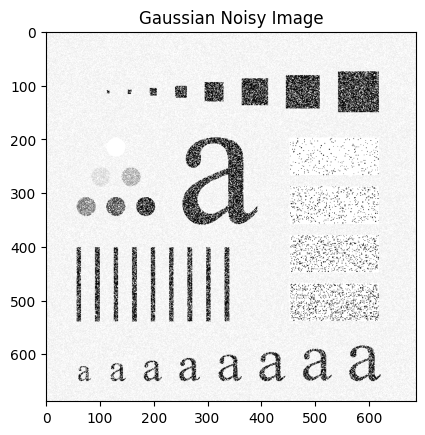

In [5]:
mean = 7
std_dev = 13 

gaussian_noise = np.random.normal(mean, std_dev, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, gaussian_noise)

plt.imshow(noisy_image, cmap='gray')
plt.title("Gaussian Noisy Image")
plt.show()

### FFT of noisy image

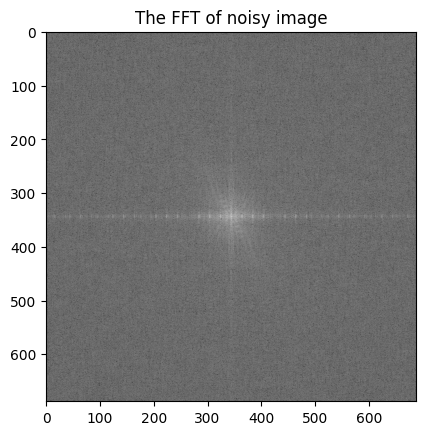

In [6]:
fft = np.fft.fft2(noisy_image)
fft_shift = np.fft.fftshift(fft)
noisy_image_fft = fft_shift

magnitude_spectrum = np.log(np.abs(noisy_image_fft) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("The FFT of noisy image")
plt.show()


### Applying the butterworth low pass filter 

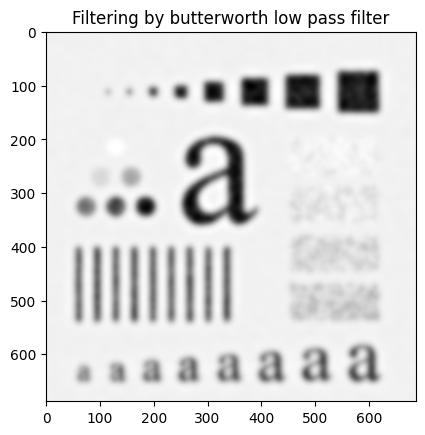

In [7]:
filtered_image = butterWorth_lowPass_filter(noisy_image_fft, 2, 25)

# transfer back to spatial domain 
filtered_image = np.fft.ifftshift(filtered_image)
butterworth_filtered_image = np.fft.ifft2(filtered_image)
butterworth_filtered_image = np.abs(butterworth_filtered_image)

plt.imshow(butterworth_filtered_image, cmap='gray')
plt.title("Filtering by butterworth low pass filter")
plt.show()

### Applying Gaussina lowpass filter 

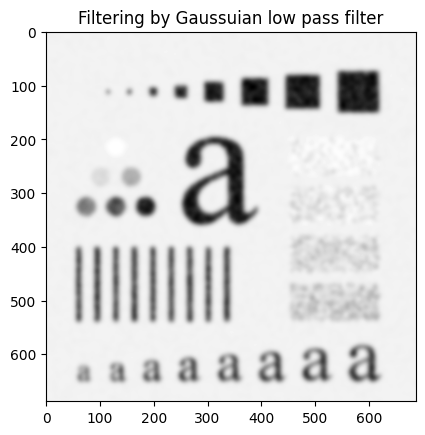

In [8]:
filtered_image = gaussian_lowPass_filter(noisy_image_fft, 25)

#transfer back to spatial domain 

filtered_image = np.fft.ifftshift(filtered_image)
gaussian_filtered_image = np.fft.ifft2(filtered_image)
gaussian_filtered_image = np.abs(gaussian_filtered_image)

plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title("Filtering by Gaussuian low pass filter")
plt.show()

### (b.) Observe the ringing effect of ideal low pass filter on the image. Use different radius (D0) of ideal low pass filter and display their results


### Ideal Low pass filter 

In [10]:
def ideal_low_pass_filter (image, cuttoff_freq):
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)

    #Ideal Lowpass filter mask
    height , width = image.shape
    c1, c2 = height /2 , width /2 

    mask = np.zeros((height, width), dtype= np.float64)
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - c1)**2 + (v - c2)**2)
            if D <=cuttoff_freq:
                mask[u,v] = 1 

    #Applying the mask
    filtered_fft = fft_shift * mask 

    #Back to spatial Domain 
    fft_ishift = np.fft.ifftshift(filtered_fft)
    filtered_image = np.fft.ifft2(fft_ishift)
    filtered_image = np.abs(filtered_image)

    return filtered_image         


### Applying ideal low pass filter for different cuttof frequency 

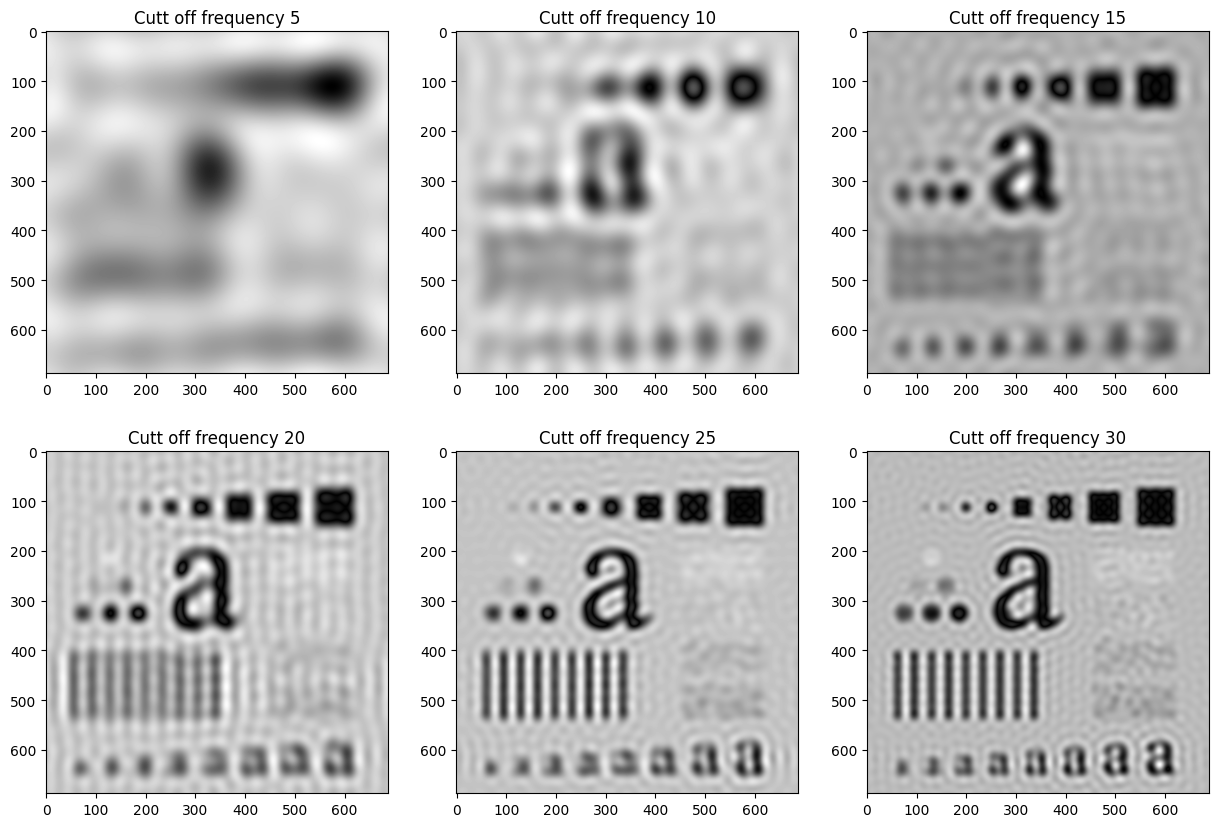

In [11]:
plt.figure(figsize=(15, 10))

for i in range (1, 7):
    filtered_image =  ideal_low_pass_filter(original_image, i * 5)
    plt.subplot(2,3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Cutt off frequency {i*5}')

plt.show()

### (c) Perform edge detection of given the noise and clean image using ideal and Gaussian high pass filters

#### Function for Ideal High pass filter for edge detection


In [15]:
def ideal_high_pass_filter(image, cuttoff_freq):
    #convert the image to frequency domain 
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)

    #Ideal High pass filter mask 
    height , width = image.shape
    c1, c2 = height/2 , width / 2

    mask = np.ones((height, width), dtype=np.float64)
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - c1) ** 2 + (v - c2) **2 )
            if D <= cuttoff_freq:
                mask[u, v] = 0 

    #Applying the mask 
    filtered_image = fft_shift * mask 

    # Back to the spatial domain 
    fft_ishift = np.fft.ifftshift(filtered_image)
    filtered_image =np.fft.ifft2(fft_ishift)
    filtered_image = np.abs(filtered_image)

    return filtered_image            

### Applying Ideal High Pass FIltering for Edge Detection 


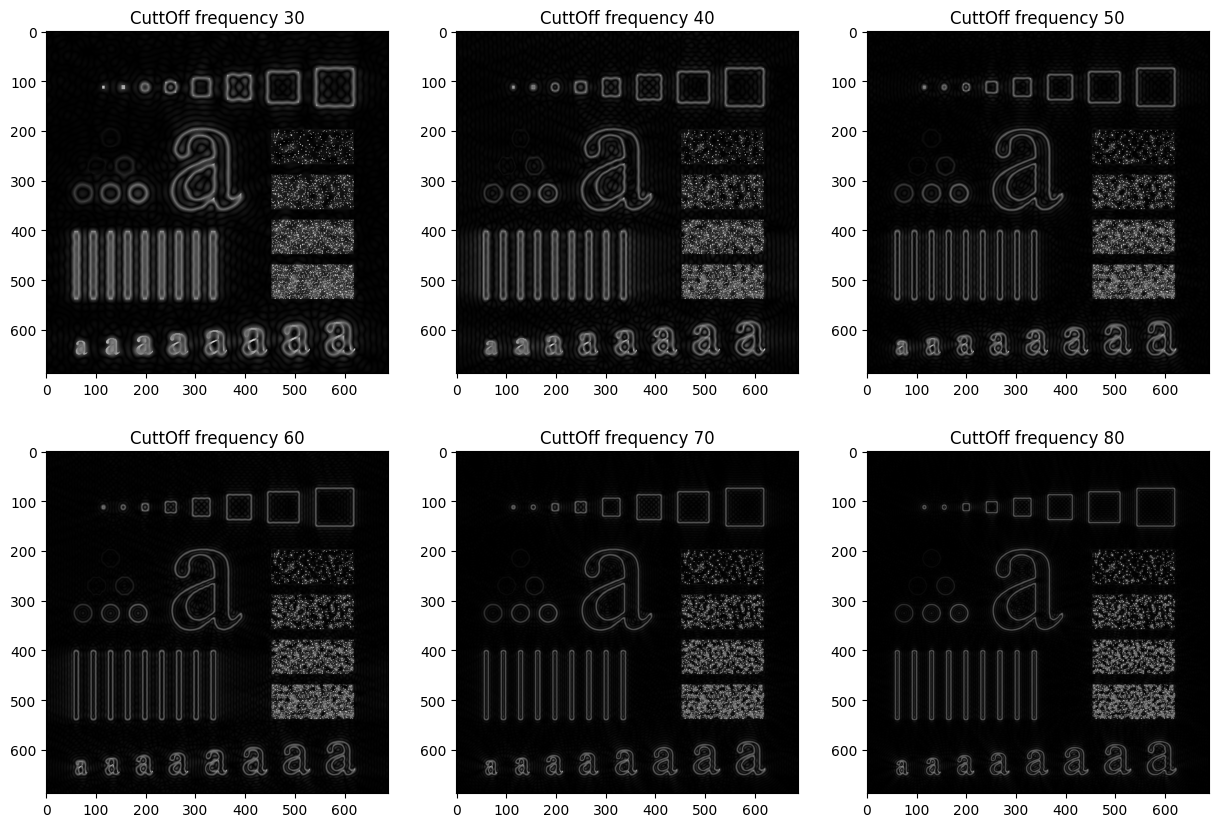

In [16]:
plt.figure(figsize=(15,10))
radius = 30 
for i in range(1,7):
    filtered_image = ideal_high_pass_filter(original_image, radius)
    plt.subplot(2,3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'CuttOff frequency {radius}')
    radius +=10

plt.show()    

### Function for Gaussian Highpass FIlter

In [21]:
def gaussian_high_pass_filter(image, cuttoff_freq):
    #convert the image to frequency domain
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)

    #Gaussian Hight pass Filter mask
    height , width = image.shape
    c1, c2 = height/2 , width /2 

    mask = np.ones((height, width), dtype=np.float64)
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - c1)**2 + (v - c2)**2)
            mask[u,v] = 1 -  np.exp(-(D**2)/ (2*(cuttoff_freq)**2))


    #Apply the mask 
    filtered_image = fft_shift * mask

    #back to spatial domain 
    fft_ishift = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(fft_ishift)
    filtered_image = np.abs(filtered_image)

    return filtered_image        


### Applying The Gaussian Gigh Pass Filter Edge Detection 


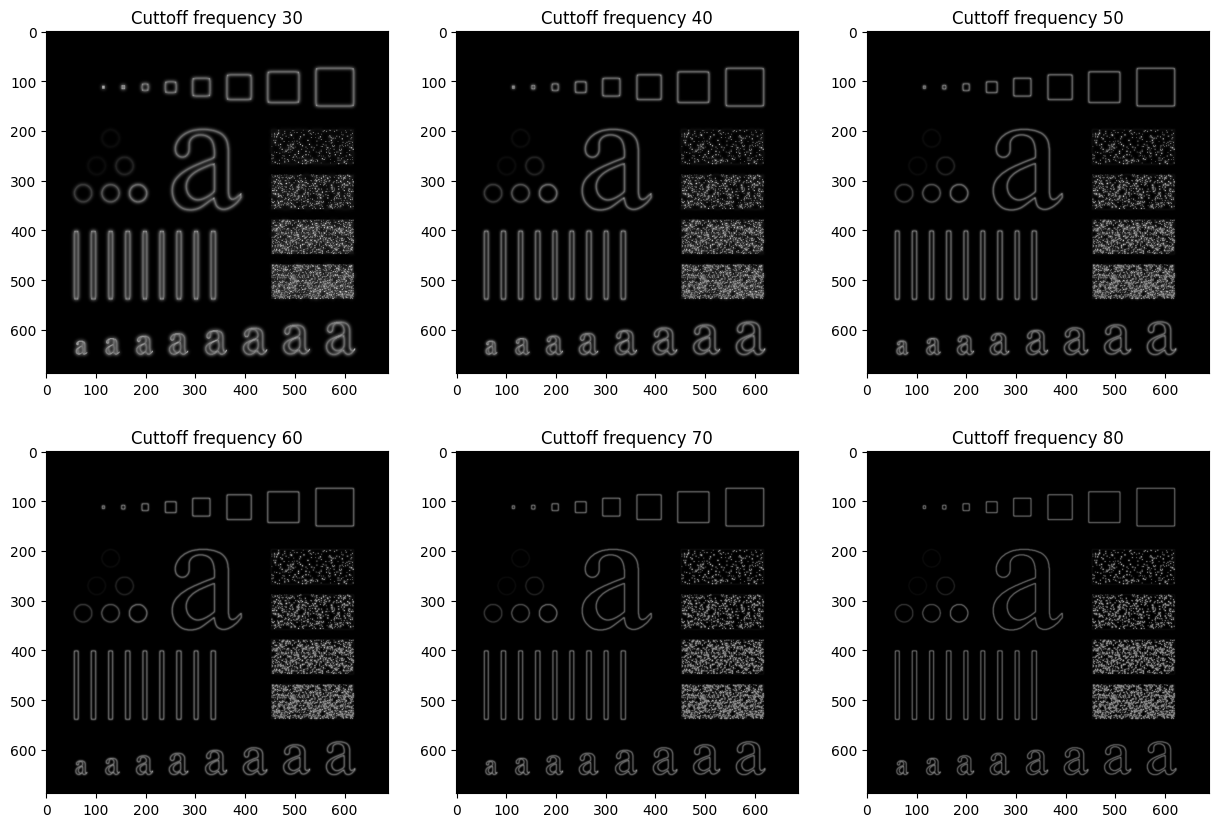

In [22]:
plt.figure(figsize=(15,10))
radius = 30 

for i in range(1, 7): 
    filtered_image = gaussian_high_pass_filter(original_image, radius)
    plt.subplot(2,3,i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Cuttoff frequency {radius}")
    radius+=10

plt.show()    